In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import random
import seaborn as sns
import pandas as pd
import glob
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score


%matplotlib inline

In [2]:
pdbs = glob.glob('*_labels.npy')
pdbs = ['_'.join(p.split('_')[0:2]) for p in pdbs]

In [3]:
len(pdbs)

273

In [4]:
ytrue = []
for pdb in pdbs:
    ytrue = ytrue + list(np.load('{}_labels.npy'.format(pdb)))

In [5]:
len(ytrue)

451

In [16]:
ypred = []
all_logits = np.empty((0,7))
n_lig_tot = 0
all_pdb_ids = []
for i,pdb in enumerate(pdbs):
    logits = np.load('{}_logits.npy'.format(pdb))
    n_ligands = logits.shape[0]
    n_lig_tot += n_ligands
    if n_ligands == 0:
        continue
    all_logits = np.vstack([all_logits,np.squeeze(np.mean(logits,axis=1))])
    all_pdb_ids = all_pdb_ids + n_ligands*[pdb]
    if n_ligands ==1 :
        ypred = ypred + [np.argmax(np.squeeze(np.mean(logits,axis=1)))]
    else:
        ypred = ypred + list(np.argmax(np.squeeze(np.mean(logits,axis=1)),axis=1))

In [17]:
len(ypred)

451

In [18]:
conf = confusion_matrix(ytrue, ypred)

In [19]:
conf

array([[126,   0,   7,   2,   9,   0,   2],
       [  2,  29,   5,   2,   5,   3,   0],
       [  8,   5,  52,   0,   6,   0,   0],
       [  3,   1,   0,  64,   0,   0,   0],
       [  5,   0,   4,   0,  36,   4,   0],
       [  2,   1,   3,   0,   3,  19,   0],
       [  7,   0,   2,   0,   9,   0,  25]], dtype=int64)

In [20]:
conf_frac = conf/np.sum(conf,axis=1)[:,None]
conf_frac = pd.DataFrame(conf_frac, index=['True ADP', 'True COA', 
        'True FAD', 'True HEM', 'True NAD', 'True NAP', 'True SAM'], 
        columns= ['Pred ADP', 'Pred COA', 'Pred FAD', 'Pred HEM', 'Pred NAD', 
                  'Pred NAP', 'Pred SAM'])

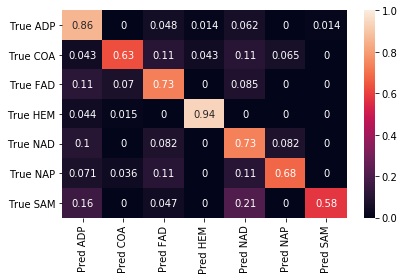

In [21]:
ax = sns.heatmap(conf_frac,vmin=0.0, vmax=1.0, annot=True)
plt.tight_layout()
#plt.savefig('/Users/freyr/Desktop/paper_images/classification/sequenceSplit_allFeatures_numbers.pdf', type='pdf')
#plt.savefig('/Users/freyr/Desktop/thesis_images/pocket_clustering/heatmap_noStructClust.eps')

In [172]:
high_conf = []
thresh = 0.75
for log,pred,true in zip(all_logits,ypred,ytrue):
    if log[pred]>thresh:
        high_conf.append(True)
    else:
        high_conf.append(False)

In [173]:
np.sum(high_conf)

292

In [174]:
conf_highconf = confusion_matrix(np.array(ytrue)[high_conf], np.array(ypred)[high_conf])

In [175]:
conf_highconf

array([[116,   0,   4,   1,   3,   0,   0],
       [  1,  20,   0,   0,   1,   0,   0],
       [  1,   0,  35,   0,   1,   0,   0],
       [  0,   0,   0,  60,   0,   0,   0],
       [  1,   0,   0,   0,  14,   2,   0],
       [  0,   0,   0,   0,   0,   7,   0],
       [  1,   0,   0,   0,   4,   0,  20]], dtype=int64)

In [176]:
conf__highconf_frac = conf_highconf/np.sum(conf_highconf,axis=1)[:,None]
conf__highconf_frac = pd.DataFrame(conf__highconf_frac, index=['True ADP', 'True COA', 
        'True FAD', 'True HEM', 'True NAD', 'True NAP', 'True SAM'], 
        columns= ['Pred ADP', 'Pred COA', 'Pred FAD', 'Pred HEM', 'Pred NAD', 
                  'Pred NAP', 'Pred SAM'])

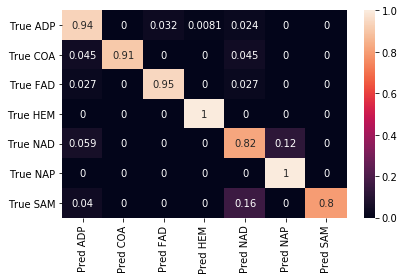

In [177]:
ax = sns.heatmap(conf__highconf_frac,vmin=0.0, vmax=1.0, annot=True)
plt.tight_layout()
#plt.savefig('/Users/freyr/Desktop/paper_images/classification/sequenceSplit_allFeatures_numbers.pdf', type='pdf')
#plt.savefig('/Users/freyr/Desktop/thesis_images/pocket_clustering/heatmap_noStructClust.eps')

In [178]:
for ids,log,pred,true in zip(all_pdb_ids,all_logits,ypred,ytrue):
    if (true==6) and (pred==4) and (log[pred]>thresh):
        print(ids,log,pred,true)

3TKA_AB [4.89625800e-03 1.59840827e-04 1.25846947e-02 2.39674393e-02
 9.27218795e-01 2.56973295e-03 2.86030844e-02] 4 6
3TKA_AB [3.83399427e-03 9.69431421e-05 2.01992039e-02 3.43560204e-02
 9.12910223e-01 4.35621757e-03 2.42471620e-02] 4 6
4X61_AB [7.04460312e-04 1.67414677e-04 1.12528659e-01 9.05234590e-02
 7.94945240e-01 2.27967666e-05 1.10813812e-03] 4 6
5W7P_AB [1.76660940e-02 7.95604283e-05 5.29392483e-03 2.07588449e-01
 7.60533392e-01 1.14259507e-04 8.72428622e-03] 4 6


In [179]:
for ids,log,pred,true in zip(all_pdb_ids,all_logits,ypred,ytrue):
    if (true==4) and (pred==5) and (log[pred]>thresh):
        print(ids,log,pred,true)

3B1F_AB [2.25559808e-03 1.28057860e-02 5.12469909e-04 9.53976589e-04
 1.43319145e-02 9.69130337e-01 9.83844620e-06] 5 4
3B1F_AB [1.10629643e-03 5.93908364e-03 2.46093317e-04 5.76408020e-05
 4.97355266e-03 9.87675190e-01 2.09558857e-06] 5 4
